# Boston House Price Predict

# Importing libraries

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [4]:
# Adding feature name to the dataframe
data.columns = boston.feature_names

# Aanalysis of data

In [5]:
# the upper 5 data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# the lower 5 data
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [7]:
data.shape

(506, 13)

In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

### details of the features:
- CRIM per capita crime rate by town 
- ZN proportion of residential land zoned for lots over 25,000 sq.ft. 
- INDUS proportion of non-retail business acres per town 
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
- NOX nitric oxides concentration (parts per 10 million) 
- RM average number of rooms per dwelling 
- AGE proportion of owner-occupied units built prior to 1940 
- DIS weighted distances to five Boston employment centres 
- RAD index of accessibility to radial highways 
- TAX full-value property-tax rate per 10,000usd 
- PTRATIO pupil-teacher ratio by town 
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
- LSTAT % lower status of the population 

Each record in the database describes a Boston suburb or town.

In [9]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

# Handling missing data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [12]:
data['CRIM'].unique()

array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

In [13]:
data['ZN'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [14]:
data['INDUS'].unique()

array([ 2.31,  7.07,  2.18,  7.87,  8.14,  5.96,  2.95,  6.91,  5.64,
        4.  ,  1.22,  0.74,  1.32,  5.13,  1.38,  3.37,  6.07, 10.81,
       12.83,  4.86,  4.49,  3.41, 15.04,  2.89,  8.56, 10.01, 25.65,
       21.89, 19.58,  4.05,  2.46,  3.44,  2.93,  0.46,  1.52,  1.47,
        2.03,  2.68, 10.59, 13.89,  6.2 ,  4.93,  5.86,  3.64,  3.75,
        3.97,  6.96,  6.41,  3.33,  1.21,  2.97,  2.25,  1.76,  5.32,
        4.95, 13.92,  2.24,  6.09,  9.9 ,  7.38,  3.24,  6.06,  5.19,
        1.89,  3.78,  4.39,  4.15,  2.01,  1.25,  1.69,  2.02,  1.91,
       18.1 , 27.74,  9.69, 11.93])

In [15]:
data['CHAS'].unique()

array([0., 1.])

In [16]:
data['NOX'].unique()

array([0.538 , 0.469 , 0.458 , 0.524 , 0.499 , 0.428 , 0.448 , 0.439 ,
       0.41  , 0.403 , 0.411 , 0.453 , 0.4161, 0.398 , 0.409 , 0.413 ,
       0.437 , 0.426 , 0.449 , 0.489 , 0.464 , 0.445 , 0.52  , 0.547 ,
       0.581 , 0.624 , 0.871 , 0.605 , 0.51  , 0.488 , 0.401 , 0.422 ,
       0.404 , 0.415 , 0.55  , 0.507 , 0.504 , 0.431 , 0.392 , 0.394 ,
       0.647 , 0.575 , 0.447 , 0.4429, 0.4   , 0.389 , 0.385 , 0.405 ,
       0.433 , 0.472 , 0.544 , 0.493 , 0.46  , 0.4379, 0.515 , 0.442 ,
       0.518 , 0.484 , 0.429 , 0.435 , 0.77  , 0.718 , 0.631 , 0.668 ,
       0.671 , 0.7   , 0.693 , 0.659 , 0.597 , 0.679 , 0.614 , 0.584 ,
       0.713 , 0.74  , 0.655 , 0.58  , 0.532 , 0.583 , 0.609 , 0.585 ,
       0.573 ])

In [17]:
data['RM'].unique()

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 6.047,
       6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 5.933, 5.841, 5.85 ,
       5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069, 5.682, 5.786,
       6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998, 5.888, 7.249,
       6.383, 6.816, 6.145, 5.927, 5.741, 6.456, 6.762, 7.104, 6.29 ,
       5.787, 5.878, 5.594, 5.885, 6.417, 5.961, 6.065, 6.245, 6.273,
       6.286, 6.279, 6.14 , 6.232, 5.874, 6.727, 6.619, 6.302, 6.167,
       6.389, 6.63 , 6.015, 6.121, 7.007, 7.079, 6.405, 6.442, 6.249,
       6.625, 6.163, 8.069, 7.82 , 7.416, 6.781, 6.137, 5.851, 5.836,
       6.127, 6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928,
       6.176, 6.021, 5.872, 5.731, 5.87 , 5.856, 5.879, 5.986, 5.613,
       5.693, 6.431, 5.637, 6.458, 6.326, 6.372, 5.822, 5.757, 6.335,
       5.942, 6.454,

In [18]:
data['AGE'].unique()

array([ 65.2,  78.9,  61.1,  45.8,  54.2,  58.7,  66.6,  96.1, 100. ,
        85.9,  94.3,  82.9,  39. ,  61.8,  84.5,  56.5,  29.3,  81.7,
        36.6,  69.5,  98.1,  89.2,  91.7,  94.1,  85.7,  90.3,  88.8,
        94.4,  87.3,  82. ,  95. ,  96.9,  68.2,  61.4,  41.5,  30.2,
        21.8,  15.8,   2.9,   6.6,   6.5,  40. ,  33.8,  33.3,  85.5,
        95.3,  62. ,  45.7,  63. ,  21.1,  21.4,  47.6,  21.9,  35.7,
        40.5,  29.2,  47.2,  66.2,  93.4,  67.8,  43.4,  59.5,  17.8,
        31.1,  36.8,  33. ,  17.5,   7.8,   6.2,   6. ,  45. ,  74.5,
        53.7,  33.5,  70.4,  32.2,  46.7,  48. ,  56.1,  45.1,  56.8,
        86.3,  63.1,  66.1,  73.9,  53.6,  28.9,  77.3,  57.8,  69.6,
        76. ,  36.9,  62.5,  79.9,  71.3,  85.4,  87.4,  90. ,  96.7,
        91.9,  85.2,  97.1,  91.2,  54.4,  81.6,  92.9,  95.4,  84.2,
        88.2,  72.5,  82.6,  73.1,  69.7,  84.1,  97. ,  95.8,  88.4,
        95.6,  96. ,  98.8,  94.7,  98.9,  97.7,  97.9,  98.4,  98.2,
        93.5,  93.6,

In [19]:
data['DIS'].unique()

array([ 4.09  ,  4.9671,  6.0622,  5.5605,  5.9505,  6.0821,  6.5921,
        6.3467,  6.2267,  5.4509,  4.7075,  4.4619,  4.4986,  4.2579,
        3.7965,  3.7979,  4.0123,  3.9769,  4.0952,  4.3996,  4.4546,
        4.682 ,  4.4534,  4.4547,  4.239 ,  4.233 ,  4.175 ,  3.99  ,
        3.7872,  3.7598,  3.3603,  3.3779,  3.9342,  3.8473,  5.4011,
        5.7209,  5.1004,  5.6894,  5.87  ,  6.0877,  6.8147,  7.3197,
        8.6966,  9.1876,  8.3248,  7.8148,  6.932 ,  7.2254,  6.8185,
        7.2255,  7.9809,  9.2229,  6.6115,  6.498 ,  5.2873,  4.2515,
        4.5026,  4.0522,  4.0905,  5.0141,  5.4007,  4.7794,  4.4377,
        4.4272,  3.7476,  3.4217,  3.4145,  3.0923,  3.0921,  3.6659,
        3.615 ,  3.4952,  2.7778,  2.8561,  2.7147,  2.421 ,  2.1069,
        2.211 ,  2.1224,  2.4329,  2.5451,  2.6775,  2.3534,  2.548 ,
        2.2565,  2.4631,  2.7301,  2.7474,  2.4775,  2.7592,  2.2577,
        2.1974,  2.0869,  1.9444,  2.0063,  1.9929,  1.7572,  1.7883,
        1.8125,  1.9

In [20]:
data['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [21]:
data['TAX'].unique()

array([296., 242., 222., 311., 307., 279., 252., 233., 243., 469., 226.,
       313., 256., 284., 216., 337., 345., 305., 398., 281., 247., 270.,
       276., 384., 432., 188., 437., 403., 193., 265., 255., 329., 402.,
       348., 224., 277., 300., 330., 315., 244., 264., 223., 254., 198.,
       285., 241., 293., 245., 289., 358., 304., 287., 430., 422., 370.,
       352., 351., 280., 335., 411., 187., 334., 666., 711., 391., 273.])

In [22]:
data['PTRATIO'].unique()

array([15.3, 17.8, 18.7, 15.2, 21. , 19.2, 18.3, 17.9, 16.8, 21.1, 17.3,
       15.1, 19.7, 18.6, 16.1, 18.9, 19. , 18.5, 18.2, 18. , 20.9, 19.1,
       21.2, 14.7, 16.6, 15.6, 14.4, 12.6, 17. , 16.4, 17.4, 15.9, 13. ,
       17.6, 14.9, 13.6, 16. , 14.8, 18.4, 19.6, 16.9, 20.2, 15.5, 18.8,
       22. , 20.1])

In [23]:
data['B'].unique()

array([3.9690e+02, 3.9283e+02, 3.9463e+02, 3.9412e+02, 3.9560e+02,
       3.8663e+02, 3.8671e+02, 3.9252e+02, 3.9050e+02, 3.8002e+02,
       3.9562e+02, 3.8685e+02, 3.8675e+02, 2.8899e+02, 3.9095e+02,
       3.7657e+02, 3.9253e+02, 3.9454e+02, 3.9433e+02, 3.0342e+02,
       3.7688e+02, 3.0638e+02, 3.8794e+02, 3.8023e+02, 3.6017e+02,
       3.7673e+02, 2.3260e+02, 3.5877e+02, 2.4831e+02, 3.7756e+02,
       3.9343e+02, 3.9563e+02, 3.8541e+02, 3.8337e+02, 3.9446e+02,
       3.8939e+02, 3.9274e+02, 3.9556e+02, 3.9397e+02, 3.9593e+02,
       3.9290e+02, 3.9068e+02, 3.9511e+02, 3.7808e+02, 3.9558e+02,
       3.9324e+02, 3.9621e+02, 3.8373e+02, 3.7694e+02, 3.9091e+02,
       3.7717e+02, 3.9492e+02, 3.8323e+02, 3.7366e+02, 3.8696e+02,
       3.8640e+02, 3.9606e+02, 3.9064e+02, 3.9230e+02, 3.9599e+02,
       3.9515e+02, 3.9218e+02, 3.9355e+02, 3.9501e+02, 3.9633e+02,
       3.5798e+02, 3.9183e+02, 3.9353e+02, 3.9476e+02, 7.0800e+01,
       3.9447e+02, 3.9269e+02, 3.9405e+02, 3.9567e+02, 3.8769e

In [24]:
data['LSTAT'].unique()

array([ 4.98,  9.14,  4.03,  2.94,  5.33,  5.21, 12.43, 19.15, 29.93,
       17.1 , 20.45, 13.27, 15.71,  8.26, 10.26,  8.47,  6.58, 14.67,
       11.69, 11.28, 21.02, 13.83, 18.72, 19.88, 16.3 , 16.51, 14.81,
       17.28, 12.8 , 11.98, 22.6 , 13.04, 27.71, 18.35, 20.34,  9.68,
       11.41,  8.77, 10.13,  4.32,  1.98,  4.84,  5.81,  7.44,  9.55,
       10.21, 14.15, 18.8 , 30.81, 16.2 , 13.45,  9.43,  5.28,  8.43,
       14.8 ,  4.81,  5.77,  3.95,  6.86,  9.22, 13.15, 14.44,  6.73,
        9.5 ,  8.05,  4.67, 10.24,  8.1 , 13.09,  8.79,  6.72,  9.88,
        5.52,  7.54,  6.78,  8.94, 11.97, 10.27, 12.34,  9.1 ,  5.29,
        7.22,  7.51,  9.62,  6.53, 12.86,  8.44,  5.5 ,  5.7 ,  8.81,
        8.2 ,  8.16,  6.21, 10.59,  6.65, 11.34,  4.21,  3.57,  6.19,
        9.42,  7.67, 10.63, 13.44, 12.33, 16.47, 18.66, 14.09, 12.27,
       15.55, 13.  , 10.16, 16.21, 17.09, 10.45, 15.76, 12.04, 10.3 ,
       15.37, 13.61, 14.37, 14.27, 17.93, 25.41, 17.58, 27.26, 17.19,
       15.39, 18.34,

In [25]:
data['PRICE'] = boston.target 

In [26]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
data.CRIM.quantile(0.999)

81.17793950000095

# Visualisation of data

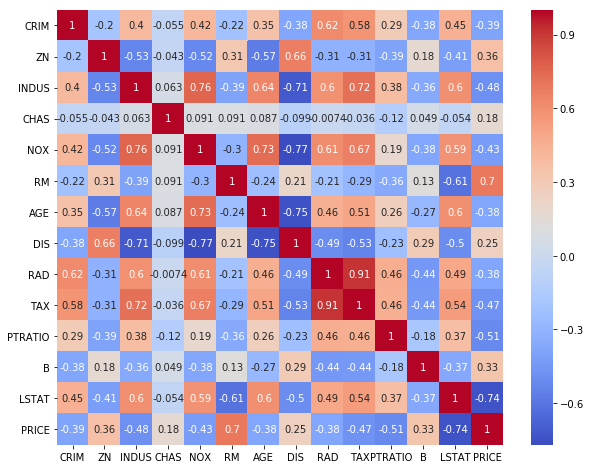

In [28]:
cor=data.corr()
#Heatmap for visualisation of correlation analysis
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
#when we write annot= True , it shows the values .
plt.show()

# Spliting the dataset

In [29]:
x=data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y=data['PRICE']

In [30]:
# split data into train and test
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2)
# we have to split the data into 80% as train and 20% as test so we have specified test_size as 0.2
print(x.shape)
print(xtr.shape)
print(xts.shape)
print(y.shape)
print(ytr.shape)
print(yts.shape)

(506, 13)
(404, 13)
(102, 13)
(506,)
(404,)
(102,)


# Applying simplelinearregression algorithm

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtr, ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
y_pred = regressor.predict(xts)

# Evaluating the model

In [33]:
#calculating r2score
from sklearn.metrics import r2_score
r2_score(yts,y_pred)

0.7368669596630177

In [34]:
#To find the error
from sklearn.metrics import mean_squared_error
mean_squared_error(yts,y_pred)

21.611136077351656

#  Applying Random Forest Regressor algorithm

In [47]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(xtr, ytr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
y_pred = reg.predict(xts)


# Evaluating the model

In [37]:
r2_score(yts,y_pred)

0.9138005685297099

In [38]:
mean_squared_error(yts,y_pred)

7.0795656862745115

# END